<a href="https://colab.research.google.com/github/AsraniSanjana/All_Codes/blob/main/All_Semester_Codes/ML_sem7/models/ML01_D17B1_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data visualization**

Sanjana Asrani_D17B_01_ML-LAB01_VISUALIZATION

BATCH A


Dataset: [diabetes.csv](https://drive.google.com/file/d/18CzsQvhZT0ODIX0b-ZwxWeDogIl4pAZr/view?usp=sharing)


features: 8
'pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age',

class-label: has/ doesnt have diabetes : 1
'label'


It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.

# Importing the required libraries

In [ ]:
!pip install squarify
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

# Displaying the Dataset
This cell displays the first few rows of the loaded dataset using the pima.head() command. It helps you quickly inspect the data and understand its structure.

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("/content/diabetes.csv", header=None, names=col_names)
pima = pima.iloc[1: , :]
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


#**HISTOGRAM**
To visualize the distribution of various features, especially those that might have a significant impact on diabetes prediction. For example, you could plot histograms of features like age, BMI, and glucose levels for both the diabetes and non-diabetes groups. This can provide insights into how these features vary across different outcomes.

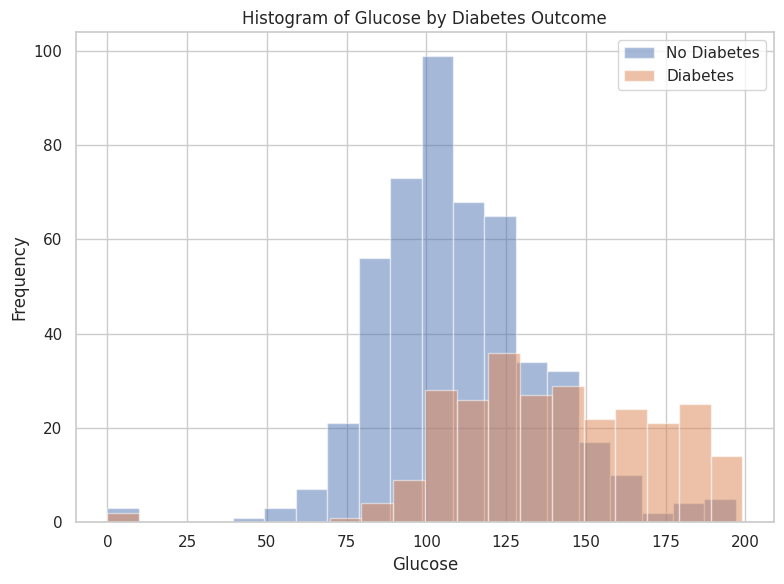

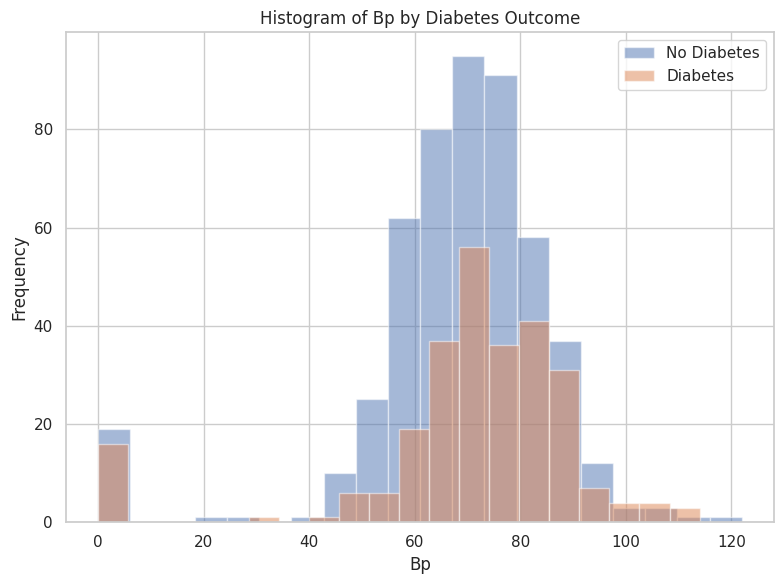

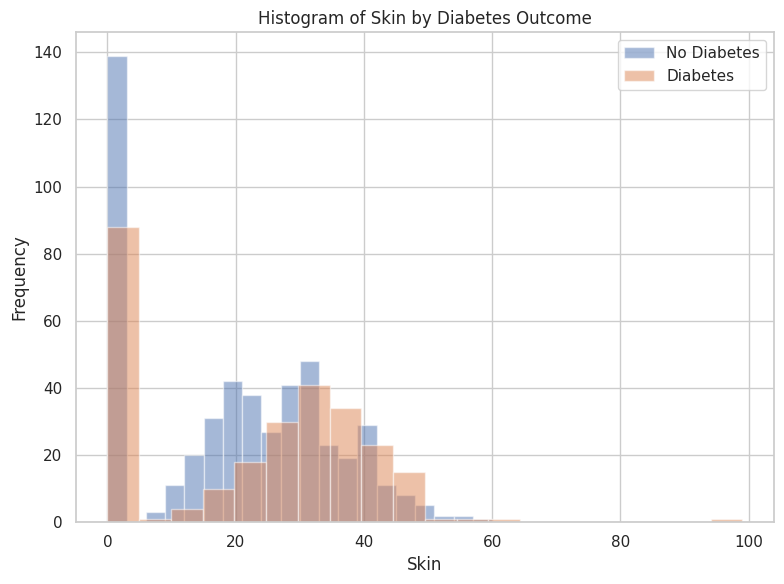

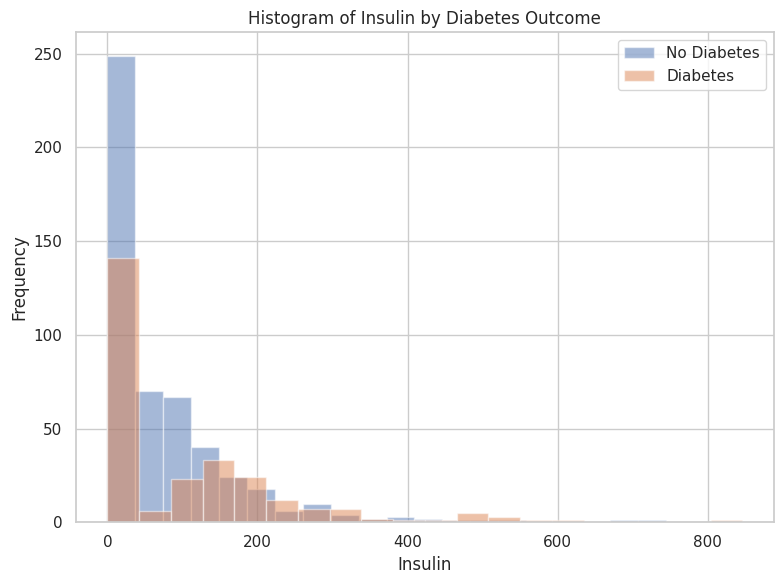

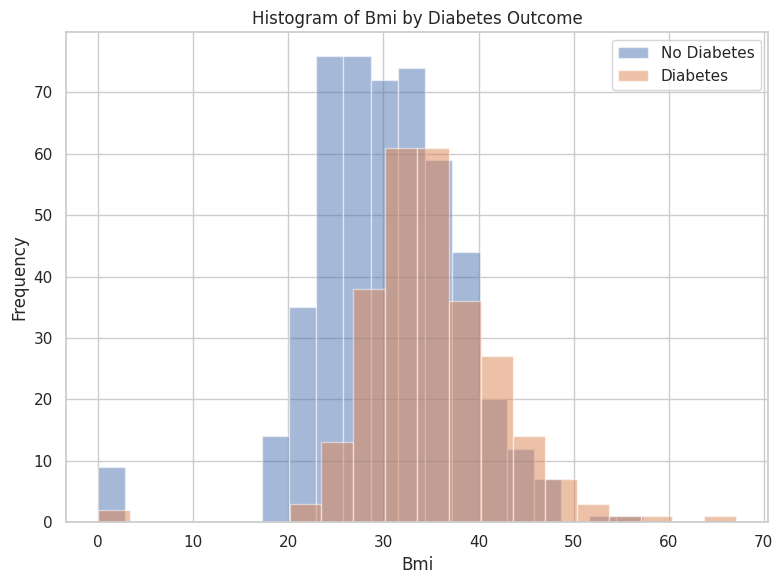

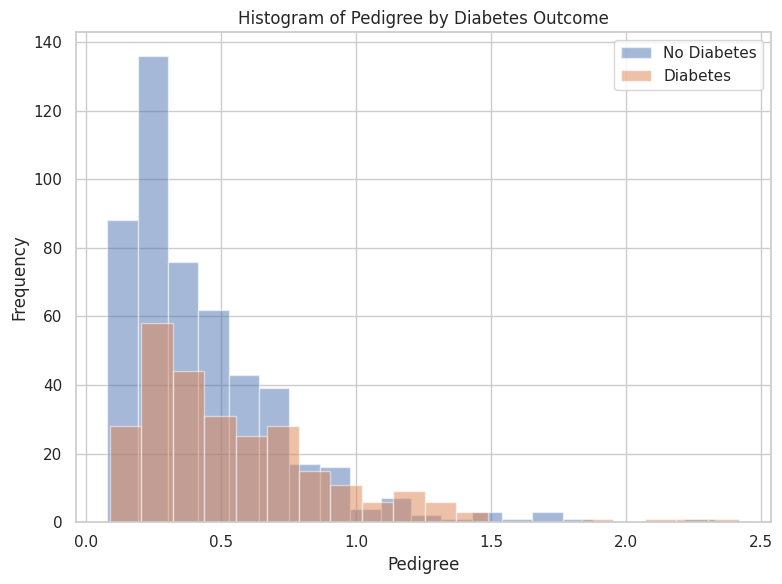

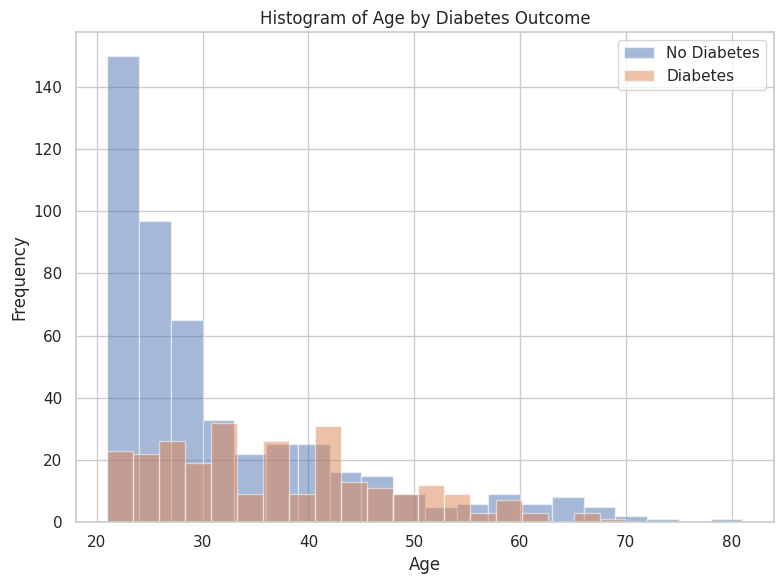

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("/content/diabetes.csv", header=None, names=col_names)
pima = pima.iloc[1:, :]

# Convert numeric columns to numeric data types
numeric_cols = ['glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima[numeric_cols] = pima[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
pima.dropna(subset=numeric_cols, inplace=True)

# List of numeric features to analyze
numeric_features = ['glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']

# Create histograms for each feature based on diabetes outcome
for feature in numeric_features:
    plt.figure(figsize=(8, 6))

    # Create histograms for diabetes and no diabetes groups
    plt.hist(pima[pima['label'] == 0][feature], bins=20, alpha=0.5, label='No Diabetes')
    plt.hist(pima[pima['label'] == 1][feature], bins=20, alpha=0.5, label='Diabetes')

    plt.title(f'Histogram of {feature.capitalize()} by Diabetes Outcome')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()


# GROUPED BAR GRAPHS:
 To compare the mean or count of different features for both diabetes and no diabetes groups side by side. This can help you identify which features might show noticeable differences between the two groups.

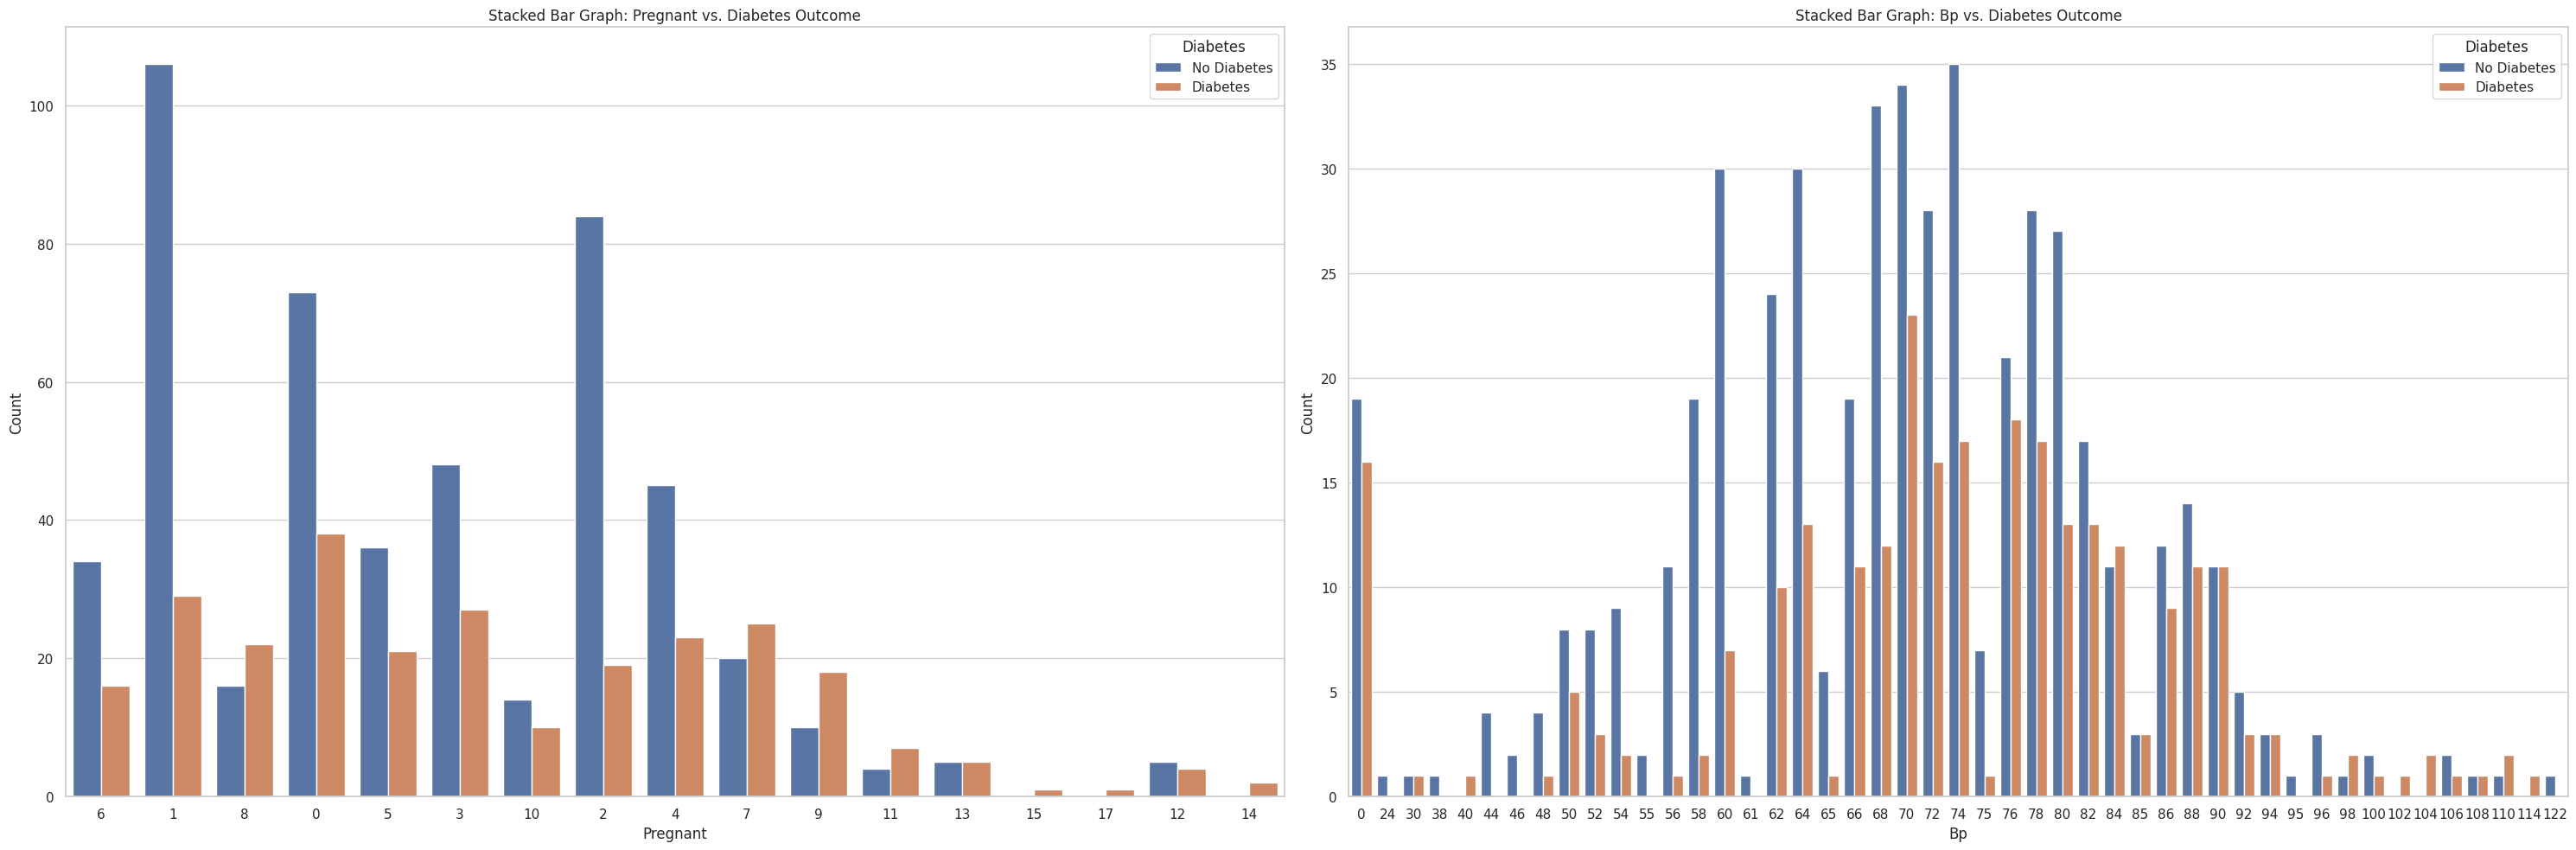

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical features for stacked bar graphs
categorical_features = ['pregnant', 'bp']

# Create side-by-side stacked bar graphs
plt.figure(figsize=(30,10 ))

for idx, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), idx + 1)
    sns.countplot(x=feature, hue='label', data=pima)
    plt.title(f'Stacked Bar Graph: {feature.capitalize()} vs. Diabetes Outcome')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()


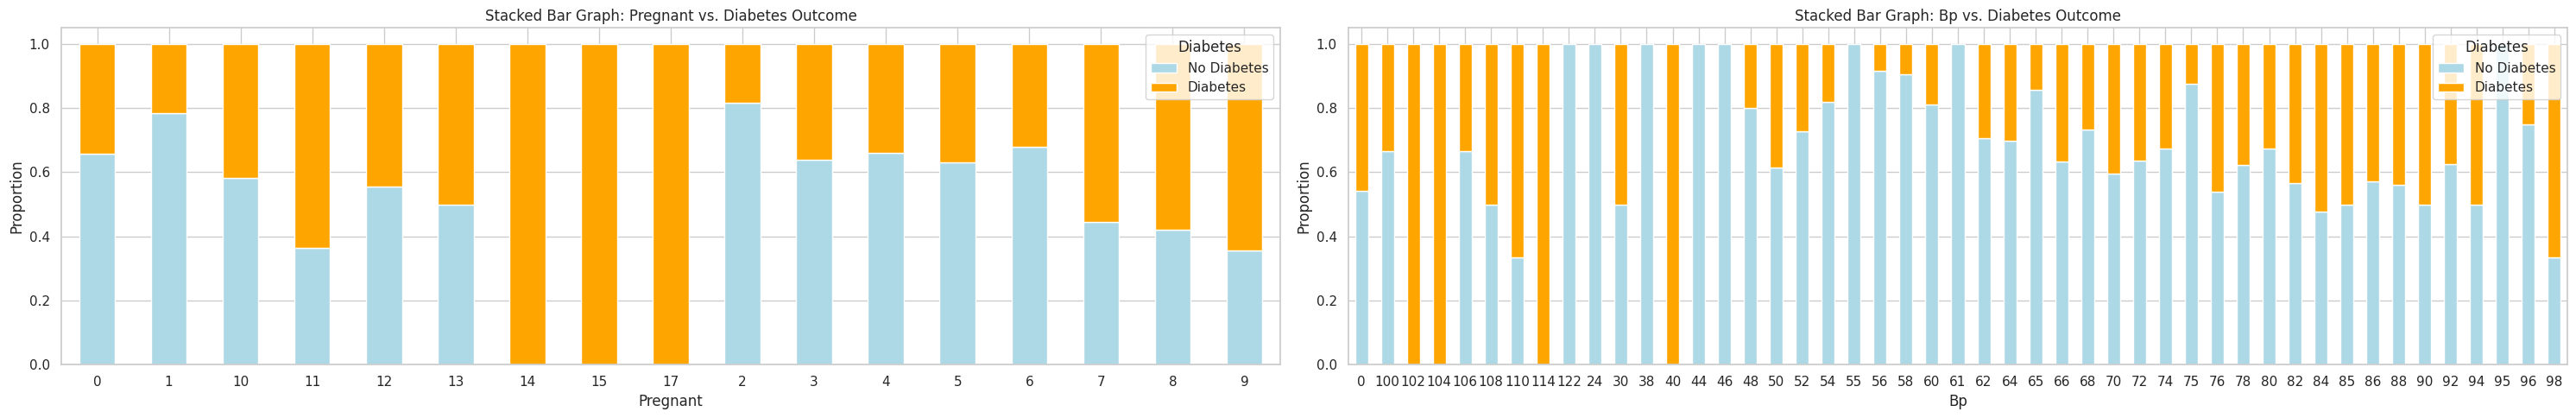

In [ ]:

# Categorical features for stacked bar graphs
categorical_features = ['pregnant', 'bp']

# Create side-by-side stacked bar graphs
plt.figure(figsize=(30, 5))

for idx, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), idx + 1)

    # Calculate proportions for each category of the categorical feature
    stacked_data = pima.groupby([feature, 'label']).size().unstack('label', fill_value=0)
    stacked_data['Total'] = stacked_data.sum(axis=1)
    stacked_data = stacked_data.div(stacked_data['Total'], axis=0)

    stacked_data.drop(columns=['Total'], inplace=True)

    stacked_data.plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightblue', 'orange'])

    plt.title(f'Stacked Bar Graph: {feature.capitalize()} vs. Diabetes Outcome')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Proportion')
    plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# ***Assesment:***


---


1. Grouped and Stacked Bar Graphs


---


    used for

**Feature Importance Analysis**: Grouped stacked bar graphs can show the distribution of feature values for different classes or outcomes in a machine learning problem. This can help you quickly identify which features have the most influence on the predictions, aiding in feature importance analysis.


    useful for

tree based models ( random forest and decision tree )



---



2. Histograms


---



    used for

**Feature Distribution Analysis**: Histograms are excellent for understanding the distribution of individual features. They can reveal whether a feature follows a normal distribution or if it's skewed, which can impact the choice of machine learning algorithms.

**Outlier Detection**: Histograms can help identify potential outliers in the data. Outliers can have a significant impact on model performance, and histograms can help you decide how to handle them.

    useful for

1. Linear Regression: Histograms are useful for understanding the distribution of residuals in linear regression
2. Density-Based Models
3. To assess the quality of clustering by showing how data points are grouped together. You can use histograms to visualize the distribution of distances within and between clusters.